In [1]:
!git clone https://github.com/kstepanov7/Road_segmentation

Cloning into 'Road_segmentation'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 167 (delta 8), reused 0 (delta 0), pack-reused 147
Receiving objects: 100% (167/167), 4.29 MiB | 3.36 MiB/s, done.
Resolving deltas: 100% (70/70), done.


In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader

!pip install imagecodecs

     |████████████████████████████████| 17.9MB 189kB/s 


In [3]:
!pip install wandb

     |████████████████████████████████| 1.4MB 2.6MB/s 
     |████████████████████████████████| 112kB 16.8MB/s 
     |████████████████████████████████| 102kB 8.4MB/s 
     |████████████████████████████████| 102kB 8.4MB/s 
     |████████████████████████████████| 163kB 17.9MB/s 
     |████████████████████████████████| 71kB 6.8MB/s 
     |████████████████████████████████| 71kB 8.2MB/s 
  Created wheel for gql: filename=gql-0.2.0-cp36-none-any.whl size=7630 sha256=aab0862e4cb9c701f04f1dc063dcd25422d3f50039109ac9a0129b6bc15a1a37
  Stored in directory: /root/.cache/pip/wheels/ce/0e/7b/58a8a5268655b3ad74feef5aa97946f0addafb3cbb6bd2da23
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp36-none-any.whl size=6489 sha256=e075237d6a607b9e3b0cb680da049d3d3cdb2d9d6e4587c316ff06be91da5eaa
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
  Created wheel for watchdog: filename=watchdog-0.10.3-cp36-none-any.whl size=73870 sha256=a60c

In [4]:
import google.colab
google.colab.drive.mount("/content/drive")
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
from Road_segmentation.dataset_wrapper import Create_Dataset

train_transforms = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomAffine(45),
        transforms.ColorJitter(brightness= (1, 1.4), contrast= (1, 1.4), hue = 0.1),
        #transforms.functional.adjust_brightness(2),
        transforms.RandomVerticalFlip(),
        transforms.ToTensor()
])

val_transforms = transforms.ToTensor()
test_transforms = transforms.ToTensor()

train_dataset = Create_Dataset('/content/drive/My Drive/GeoAlert/Ottawa-Dataset/train/images','/content/drive/My Drive/GeoAlert/Ottawa-Dataset/train/masks', train_transforms)
test_dataset = Create_Dataset('/content/drive/My Drive/GeoAlert/Ottawa-Dataset/test/images','/content/drive/My Drive/GeoAlert/Ottawa-Dataset/test/masks', test_transforms)
val_dataset = Create_Dataset('/content/drive/My Drive/GeoAlert/Ottawa-Dataset/val/images','/content/drive/My Drive/GeoAlert/Ottawa-Dataset/val/masks', val_transforms)

train_loader = DataLoader(train_dataset, batch_size = 2, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size = 1, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size = 1, shuffle=False)

torch.Size([2, 3, 512, 512])
torch.Size([2, 3, 512, 512])
tensor(0.1071) tensor(0.1071) tensor(0.1071)
torch.Size([2, 3, 512, 512])
torch.Size([2, 3, 512, 512])
tensor(0.1560) tensor(0.1560) tensor(0.1560)


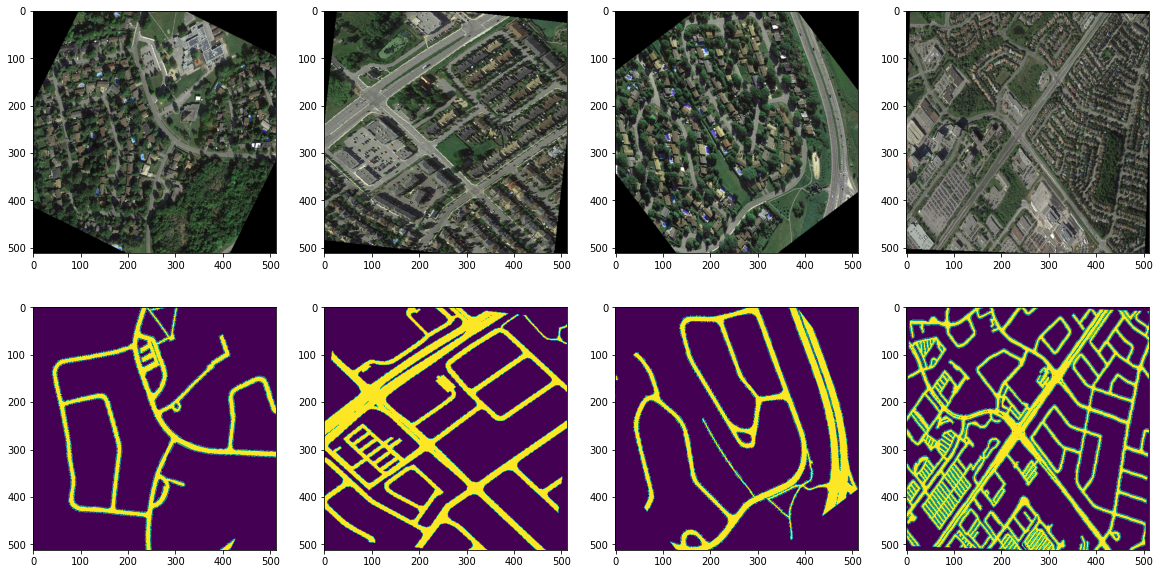

In [ ]:
fig, ax = plt.subplots(2,4, figsize = (20,10))
i = 0 
for x, y in train_dataloader:
    print(x.shape)
    print(y.shape)
    print(y[0,0].mean(), y[0,1].mean(), y[0,2].mean())
    image = torchvision.transforms.functional.to_pil_image(x[0])
    outline = torchvision.transforms.functional.to_pil_image(y[0,0])

    ax[0,i].imshow(image)
    ax[1,i].imshow(outline)
    image = torchvision.transforms.functional.to_pil_image(x[1])
    outline = torchvision.transforms.functional.to_pil_image(y[1,0])
    i += 1
    ax[0,i].imshow(image)
    ax[1,i].imshow(outline)
    i += 1
    if i > 2:
      break

In [6]:
from Road_segmentation.models.metrics import VGGPerceptualLoss
from Road_segmentation.models.metrics import IoULoss
from Road_segmentation.models.unet import UNet

from Road_segmentation.train_deep import train

DO_TRAIN = True

In [7]:
model = UNet().to(device)

if DO_TRAIN:
    criterion = VGGPerceptualLoss().to(device)
    optimizer = optim.Adam(model.parameters(), lr = 1e-3)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)
    train(model, optimizer, criterion, train_loader, val_loader, device, n_epochs= 101, scheduler = scheduler)

else:
    model.load_state_dict(torch.load('/content/drive/My Drive/GeoAlert/Ottawa-Dataset/weights/VGG+IoU.pth'))

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch: 0
iou_train: 0.3098681879496799 iou_val: 0.0018611300413161663
loss_train: 1.231166524546487 loss_val: 0.9915434916814169
time: 80.60717797279358
------------------------------------------------------------
Epoch: 5
iou_train: 0.5001975053790234 iou_val: 0.2715904070739253
loss_train: 0.5983895914895194 loss_val: 0.4084567228953044
time: 268.30644035339355
------------------------------------------------------------
Epoch: 10
iou_train: 0.5754000773703808 iou_val: 0.513882084863167
loss_train: 0.24773176227297103 loss_val: -0.4444257418314616
time: 456.09430384635925
------------------------------------------------------------
Epoch: 15
iou_train: 0.6057190897666829 iou_val: 0.5314205432059578
loss_train: 0.05427612577165876 loss_val: -0.5640871326128641
time: 643.4244382381439
------------------------------------------------------------
Epoch: 20
iou_train: 0.6786695983912476 iou_val: 0.5605996546850406
loss_train: -0.1750475423676627 loss_val: -0.7572757601737976
time: 831.121

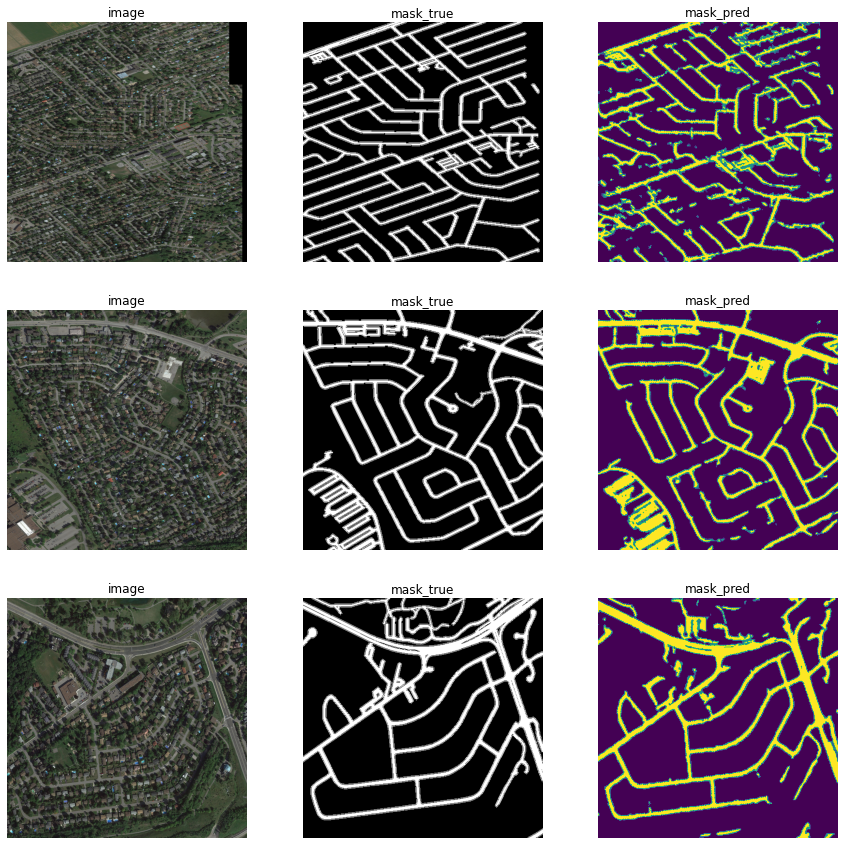

In [8]:
def plot_results(net, tr = 0, title = None):
  fig, ax = plt.subplots(3,3, figsize = (15,15))
  i = 0
  for image, out in test_dataset:

    image = image.view(1, 3, 512, 512)
    image = image.to(device)
    pred = net(image)
    pred = (pred.sigmoid().detach()).cpu().numpy()

    pred[pred <= tr] = 0
    pred[pred > tr] = 1
    
    image = torchvision.transforms.functional.to_pil_image(image[0].cpu())
    out = torchvision.transforms.functional.to_pil_image(out)
    ax[i,0].imshow(image)
    ax[i,0].set(title = 'image')
    ax[i,1].imshow(out)
    ax[i,1].set(title = 'mask_true')
    ax[i,2].imshow(pred[0,0,:,:])
    ax[i,2].set(title = 'mask_pred')
    ax[i,0].axis('off')
    ax[i,1].axis('off')
    ax[i,2].axis('off')

    i += 1
    if i == 3:
      break
  
  plt.show()
  if title != None:
    fig.savefig(title+'.png', bbox_inches='tight', dpi=400)
    
plot_results(model, tr = 0.55)

In [9]:
from sklearn.metrics import f1_score, recall_score, precision_score
from Road_segmentation.models.metrics import calc_iou
import glob

def compare_metrics(pred, true, tr = 0):

    pred[pred <= tr] = 0
    pred[pred > tr] = 1

    iou = calc_iou(pred[0,0], true)
    pred = pred.reshape(-1)
    true = true.reshape(-1)
    f1 = f1_score(true.round(), pred.round(), average='macro')
    recall = recall_score(true.round(), pred.round(), average='macro')
    precision = precision_score(true.round(), pred.round(), average='macro')
    
    return f1, recall, precision, iou

In [19]:
scores, titles = [], []

for f in glob.glob('/content/drive/My Drive/GeoAlert/Ottawa-Dataset/weights/*.pth'):

  print(f[f.find('weights/')+8:f.find('.')])
  net = UNet().to(device)
  net.load_state_dict(torch.load(f))
  run_scores, loss_val = [], []
  for image, mask in test_dataset:

    image = image.view(1, 3, 512, 512)
    image = image.to(device)
    mask = mask.to(device)
    pred = net(image)

    pred = (pred.sigmoid().detach()).cpu().numpy()
    mask = mask[1].detach().cpu().numpy()
    run_scores.append(compare_metrics(pred, mask, tr = 0.6))

  scores.append(np.mean(run_scores, axis = 0))
  titles.append(f[48:f.find('.')])

BCE
jacc_loss
dice_loss
focal_loss
DiceBCE
DiceFocal
VGG+IoU
VGG+MSE


In [21]:
import pandas as pd

table = pd.DataFrame({' ': ['f1', 'recall', 'precision', 'IoU'], 'Cross Entropy': scores[0], 'Jaccard loss': scores[1],
                      'Dice loss': scores[2], 'Focal loss': scores[3], 'DiceBCE': scores[4], 'DiceFocal': scores[5],
                      'VGG+IoU': scores[6]})
table = table.set_index(' ')
table = table.T
table

,f1,recall,precision,IoU
Cross Entropy,0.150694,0.345467,0.187011,0.148489
Jaccard loss,0.825442,0.795733,0.872959,0.560088
Dice loss,0.819753,0.787471,0.874777,0.548294
Focal loss,0.791437,0.759275,0.850839,0.494899
DiceBCE,0.811073,0.776694,0.873692,0.530034
DiceFocal,0.795373,0.764795,0.848759,0.503054
VGG+IoU,0.845011,0.827242,0.867740,0.604740
